# Task 3.1: Streaming API of Twitter 

In [1]:
import tweepy
from tweepy import OAuthHandler

consumer_key = "cNbkKHve3645xLIVgJjQbrWg6"
consumer_secret = "B1SWKCIMFQjhh3Y5YGstKMvl8t7IAPTha1jxXy5b3IC6K8wz7w"
access_token = "3720533727-cBbDc2bDnDSU6f9SuC3ti4oQcfTkMk7VbVmh9ZW"
access_secret = "k2aioMNx3tCfw6jW9teksQ98WllWbKogVQF4YW0sRYTuW"

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [4]:
from tweepy import Stream
from tweepy.streaming import StreamListener
 
class MyListener(StreamListener):
 
    def on_data(self, data):
        try:
            with open('ArtificialIntelligenceTweets.json', 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
 
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['ArtificialIntelligence'])
print "OK"

420


KeyboardInterrupt: 

# Task 3.2: Analizing tweets - Counting terms

In [2]:
import json  
with open('ArtificialIntelligenceTweets.json','r') as json_file:
    for line in json_file:
        tweet = json.loads(line)
        print tweet["text"]

RT @marcusborba: A look at #MachineLEarning Evolution https://t.co/FbAKmXeeuq #ArtificialIntelligence #DataScience #AI… 
RT @MikeQuindazzi: By 2030 #ArtificialIntelligence is poised to #automate 38% of US #jobs, yet will #AI drive job growth?… 
RT @Rogeliketweety: “The Global Annual Achievement #Awards for #ArtificialIntelligence #AwardsAI ” by @DrAndyPardoe https://t.co/UgQURetkAP…
RT @Sarahetodd: How #ArtificialIntelligence May Change the Face of Business #changingbusiness #industry40 #futureofwork… 
RT @lisabriercliffe: Does Adgorithms have the secret sauce for artificial intelligence marketing? - Diginomica https://t.co/VjGoB3jEDI #art…
RT @RandomizerTest: [Tech] - Uber setting up artificial intelligence lab in Toronto | New Zealand Herald - #ArtificialIntelligence #AI
RT @ImDataScientist: https://t.co/LcJvHeor7j #ArtificialIntelligence #machinelearning #games
Even #IKEA dives into world of #ArtificialIntelligence! https://t.co/5GHnI2ZqUQ https://t.co/ArC2u8iIp2
RT @InvestorIdeas: 

In [3]:
import json
 
with open('ArtificialIntelligenceTweets.json', 'r') as f:
    line = f.readline() 
    tweet = json.loads(line) 
    print(json.dumps(tweet, indent=4))

{
    "contributors": null, 
    "truncated": false, 
    "text": "RT @marcusborba: A look at #MachineLEarning Evolution https://t.co/FbAKmXeeuq #ArtificialIntelligence #DataScience #AI\u2026 ", 
    "is_quote_status": false, 
    "in_reply_to_status_id": null, 
    "id": 861684721033588736, 
    "favorite_count": 0, 
    "source": "<a href=\"https://roundteam.co\" rel=\"nofollow\">RoundTeam</a>", 
    "retweeted": false, 
    "coordinates": null, 
    "timestamp_ms": "1494276621479", 
    "entities": {
        "user_mentions": [
            {
                "id": 18068926, 
                "indices": [
                    3, 
                    15
                ], 
                "id_str": "18068926", 
                "screen_name": "marcusborba", 
                "name": "Marcus Borba"
            }
        ], 
        "symbols": [], 
        "hashtags": [
            {
                "indices": [
                    27, 
                    43
                ], 
             

In [4]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [5]:
with open('ArtificialIntelligenceTweets.json', 'r') as f:
#import io
#f=io.open('data/stream_barcelona.json', 'r', encoding='utf8' )
     for line in f:
        tweet = json.loads(line)
        tokens = preprocess(tweet['text'])
        print(tokens)

[u'RT', u'@marcusborba', u':', u'A', u'look', u'at', u'#MachineLEarning', u'Evolution', u'https://t.co/FbAKmXeeuq', u'#ArtificialIntelligence', u'#DataScience', u'#AI', u'\u2026']
[u'RT', u'@MikeQuindazzi', u':', u'By', u'2030', u'#ArtificialIntelligence', u'is', u'poised', u'to', u'#automate', u'38', u'%', u'of', u'US', u'#jobs', u',', u'yet', u'will', u'#AI', u'drive', u'job', u'growth', u'?', u'\u2026']
[u'RT', u'@Rogeliketweety', u':', u'\u201c', u'The', u'Global', u'Annual', u'Achievement', u'#Awards', u'for', u'#ArtificialIntelligence', u'#AwardsAI', u'\u201d', u'by', u'@DrAndyPardoe', u'https://t.co/UgQURetkAP', u'\u2026']
[u'RT', u'@Sarahetodd', u':', u'How', u'#ArtificialIntelligence', u'May', u'Change', u'the', u'Face', u'of', u'Business', u'#changingbusiness', u'#industry40', u'#futureofwork', u'\u2026']
[u'RT', u'@lisabriercliffe', u':', u'Does', u'Adgorithms', u'have', u'the', u'secret', u'sauce', u'for', u'artificial', u'intelligence', u'marketing', u'?', u'-', u'Diginomi

In [6]:
import operator 
import json
from collections import Counter

fname = 'ArtificialIntelligenceTweets.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_all = [term for term in preprocess(tweet['text'])]
        # Update the counter
        count_all.update(terms_all)
    print(count_all.most_common(5))

[(u':', 242), (u'RT', 191), (u'\u2026', 181), (u'#ArtificialIntelligence', 154), (u'#AI', 126)]


In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") # download the stopword corpus on our computer
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'RT']

[nltk_data] Downloading package stopwords to /home/pau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import operator 
import json
from collections import Counter
 
fname = 'ArtificialIntelligenceTweets.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        count_all.update(terms_stop)
    for word, index in count_all.most_common(5):
        print '%s : %s' % (word, index)

… : 182
#ArtificialIntelligence : 155
#AI : 127
#artificialintelligence : 41
#IoT : 41


In [9]:
terms_hash = [term for term in preprocess(tweet['text']) 
              if term.startswith('#')]
print terms_hash

[u'#ArtificialIntelligence', u'#Infographic', u'#AI', u'#MachineLearning', u'#BigData', u'#ML', u'#makeyourownlane']


In [10]:
terms_only = [term for term in preprocess(tweet['text']) 
              if term not in stop and
              not term.startswith(('#', '@'))]
print terms_only

[u'The', u'Different', u'Fields', u'\u2026']


# TaskTask 3.3: Case study

In [11]:
import operator 
import json
from collections import Counter
 
fname = 'Lab3.CaseStudy.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_hash = [term for term in preprocess(tweet['text']) if term.startswith('#') and term not in stop]        
        count_all.update(terms_hash)
# Print the first 10 most frequent words
print(count_all.most_common(15))

[(u'#Barcelona', 68), (u'#Messi', 30), (u'#FCBLive', 17), (u'#UDLasPalmas', 13), (u'#VamosUD', 13), (u'#barcelona', 10), (u'#CopaDelRey', 8), (u'#empleo', 6), (u'#BCN', 6), (u'#riesgoimpago', 6), (u'#news', 5), (u'#LaLiga', 5), (u'#SportsCenter', 4), (u'#LionelMessi', 4), (u'#Informe', 4)]


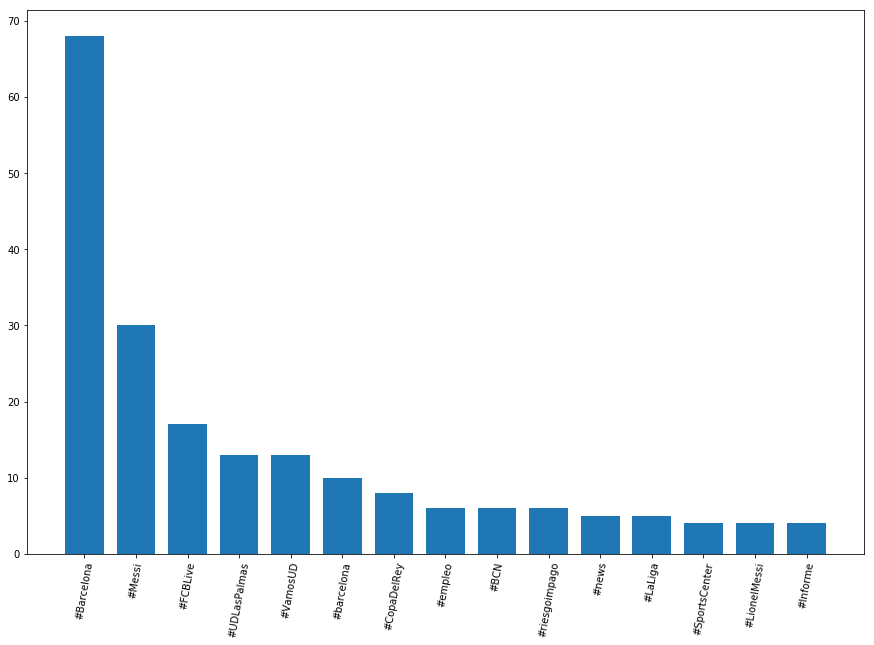

In [12]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,10)
import matplotlib.pyplot as plt

sorted_x, sorted_y = zip(*count_all.most_common(15))
#print(sorted_x, sorted_y)

plt.bar(range(len(sorted_x)), sorted_y, width=0.75, align='center');
plt.xticks(range(len(sorted_x)), sorted_x, rotation=80);
plt.axis('tight');

# Proposta de l'estudiant

## Explicació
Capturarem els Tweets a les 15:30 durant 5 segons relacionats amb Telefónica, donat l'atac que s'ha dut a terme avui.
## Procediment
En primer lloc guardem els Tweets capturats a TelefonicaTweets.json

In [15]:
# ************************************************************
# *************** Task 3.4: Student proposal *****************
# ************************************************************

from tweepy import Stream
from tweepy.streaming import StreamListener

class MyListener2(StreamListener):
 
    def on_data(self, data):
        try:
            with open('TelefonicaTweets.json', 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
 
twitter_stream2 = Stream(auth, MyListener2())
twitter_stream2.filter(track=['Telefonica', 'Ransomware'])
print "OK"

420


KeyboardInterrupt: 

## Visualització de Tweets
Comprovem els Tweets imprimint-los

In [16]:
with open('TelefonicaTweets.json','r') as json_file:
    for line in json_file:
        tweet = json.loads(line)
        print tweet["text"]

RT @mundowdg: Bah. Lo de #Telefonica es el típico caso de luser con muchos privilegios y poca vista. En estos casos con amputar una mano ya…
RT @norcoreano: .@Telefonica Una respuesta sincera nos ayudará a encontrar el problema, ¿habéis abierto alguna página de guarrerías con Int…
RT @norcoreano: .@Telefonica Hay que poner mayúsculas y números en las contraseñas, mezclados a poder ser.
Ataque masivo de ransomware que afecta a un elevado número de organizaciones españolas https://t.co/9iSkKXSBC5
RT @elconfidencial: ÚLTIMA HORA: Hackean la sede de Telefónica con un ataque de 'ransomware' https://t.co/Brf8iFQ4iV
Telefonica no deja darse de baja al ransomware.
RT @lfernanp: Cyber attack to #Telefonica via ransomware confirmed to be focusing more companies in Spain. https://t.co/9YX1kTN9xe
RT @norcoreano: .@Telefonica Hay que poner mayúsculas y números en las contraseñas, mezclados a poder ser.
@norcoreano @Telefonica https://t.co/74SvrwWajX
RT @hackplayers: WannaCryptor Ransomware - Demons

## Termes i hashtags
Imprimim els hastaghs i termes de l'últim Tweet

In [19]:
terms_hash = [term for term in preprocess(tweet['text']) 
              if term.startswith('#')]
print terms_hash

[u'#Ransomware']


In [20]:
terms_only = [term for term in preprocess(tweet['text']) 
              if term not in stop and
              not term.startswith(('#', '@'))]
print terms_only

[u'Now', u'available', u'slick', u'marketing', u'https://t.co/B2WXcxbR1L', u'amp']


# Anàlisi personal de Tweets
## Concepte
Procedim a analitzar el conjunt de 420 Tweets que ens ha capturat el Streaming de Twitter.
## Procediment
Agafem en primer lloc els hastags dels Tweets, els comptem i els ordenem de major a menor número de repeticions.

In [22]:
import operator 
import json
from collections import Counter
 
fname = 'TelefonicaTweets.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_hash = [term for term in preprocess(tweet['text']) if term.startswith('#') and term not in stop]        
        count_all.update(terms_hash)
# Print the first 10 most frequent words
print(count_all.most_common(15))

[(u'#Telefonica', 36), (u'#ransomware', 14), (u'#Ransomware', 10), (u'#ciberataque', 6), (u'#Telef', 4), (u'#ramsomware', 3), (u'#telefonica', 3), (u'#Hackeo', 2), (u'#Bitcoin', 2), (u'#telef', 1), (u'#criptolocker', 1), (u'#chemaalonso', 1), (u'#VerguenzaAjena', 1), (u'#Tecnologia', 1), (u'#NotiMac', 1)]


## Visualització gràfica
Finalment imprimim un plot que representi els hastags més utilitzats a la recollida de Tweets relacionats amb el problema de Telefónica d'avui.

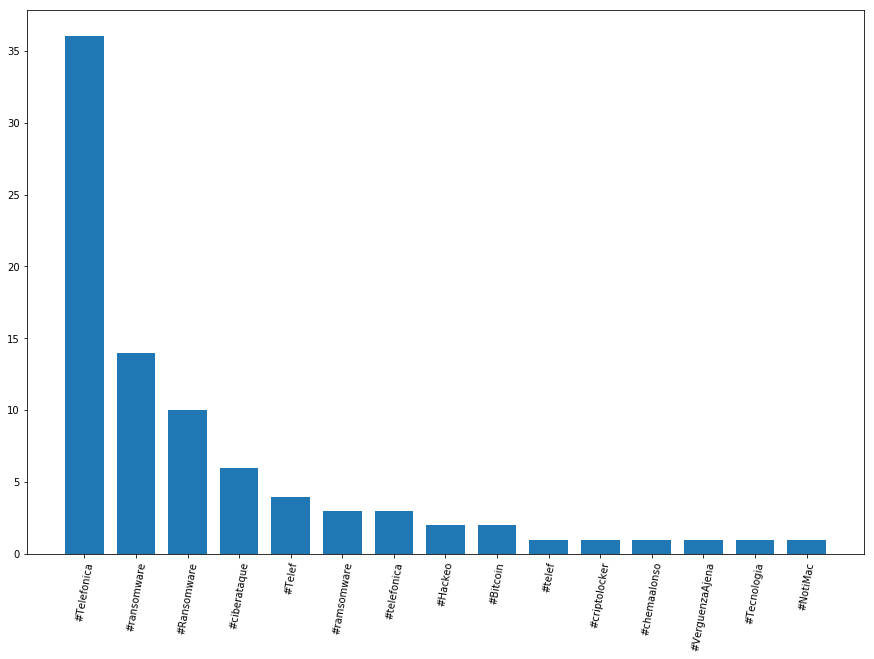

In [23]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,10)
import matplotlib.pyplot as plt

sorted_x, sorted_y = zip(*count_all.most_common(15))
#print(sorted_x, sorted_y)

plt.bar(range(len(sorted_x)), sorted_y, width=0.75, align='center');
plt.xticks(range(len(sorted_x)), sorted_x, rotation=80);
plt.axis('tight');

# Conclusions
## Recompte de hashtags
Observant la gràfica veiem que els hashtags més usats són els de Telefónica i Ransomware, que donen a entendre ràpidament el cas del dia, sense necessitar molta més informació.